In [1]:
from deb.simulations import simulate_deb, aux, plot_res, allStat
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
data_list = list(Path("/mnt/DataDisk/grid_time_series").glob("*.csv"))

In [3]:

species_db = pd.read_csv("data/deb_species_list.csv", index_col=0)
species_mi = {}
for i in species_db.iloc:
    if not np.isnan(i["MarketWeight"]) and not np.isnan(i["InitialSize"]):
        species_mi[i["Name"]] = {
            "MarketWeight": i["MarketWeight"],
            "InitialSize": i["InitialSize"]
        }


for i in species_mi:
    print(i)

species = "Sparus_aurata"

Argyrosomus_regius
Dentex_dentex
Dicentrarchus_labrax
Diplodus_puntazzo
Gadus_morhua
Lithognathus_mormyrus
Oncorhynchus_mykiss
Pagellus_erythrinus
Polyprion_americanus
Salmo_salar
Salmo_trutta
Scophthalmus_maximus
Solea_solea
Sparus_aurata
Thunnus_thynnus


In [4]:
mi_data = species_mi[species]
mi_data

{'MarketWeight': 400.0, 'InitialSize': 1.2}

In [12]:
data_file = data_list[0].name



data = pd.read_csv(data_list[0], index_col=0)

ttm45 = []
ttm85 = []
ttmref = []

for i in np.arange(0, len(data) - len(data)%365 -365, 365):
    inputs45 = np.vstack(
        (data.index.values+1, data["rcp4_5"].values+273.15)).T[i:i+365*5]

    res45 = simulate_deb(species, inputs45, initial_size=mi_data["InitialSize"])
    # print(res45[0.85][2])

    TTM = np.where(res45[0.85][2] >= mi_data["MarketWeight"])[0]

    ttm45.append(TTM[0])

    inputs85 = np.vstack(
    (data.index.values+1, data["rcp4_5"].values+273.15)).T[i:i+365*5]

    res85 = simulate_deb(species, inputs85, initial_size=mi_data["InitialSize"])
    # print(res45[0.85][2])

    TTM = np.where(res85[0.85][2] >= mi_data["MarketWeight"])[0]

    ttm45.append(TTM[0])


    





In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Time to market weight [days]')

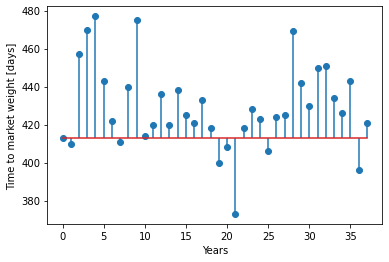

In [11]:
fig, ax = plt.subplots()
# ax.plot(np.arange(2021, 2021+len(rcp45), 1), rcp45, color=colors)
# ax.plot(np.arange(2021, 2021+len(rcp45), 1), rcp45, "*-")
ax.stem(ttm45, bottom=ttm45[0])
ax.set_xlabel("Years")
ax.set_ylabel("Time to market weight [days]")